<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-о-EDA" data-toc-modified-id="Вывод-о-EDA-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод о EDA</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «...». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Описание проекта

Требуется защитить данные клиентов страховой компании.\
Основным критерием качества метода будет являтся отсутсвие негативного влияния разработанного метода на модель Линейной регресии.\
Имеется дата-сет, состоящий из 5000 строк и 5 столбцов

# Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression


# Пользовательские функции

In [2]:
#  Функция для первичного анализа дата-сета
def analyze_df(df):
    # выводим размерность датафрейма
    display("Размерность датафрейма:")
    display(df.shape)

    # выводим информацию о датафрейме
    display("Информация о датафрейме:")
    display(df.info())

    # выводим статистическую информацию о датафрейме
    display("Статистическая информация о датафрейме:")
    display(df.describe())

    # выводим первые 10 строк датафрейма
    display("Первые 10 строк датафрейма:")
    display(df.head(10))

    # выодим кол-во пропусков
    display("Кол-во пропусков")
    display(df.isna().sum()[df.isna().sum() > 0])
    
    # выодим кол-во дубликатов
    display("Кол-во дубликатов")
    display(df.duplicated().sum()[df.duplicated().sum() > 0])
    
    # выводим матрицу корреляции
    display(df.corr().style.background_gradient(cmap='coolwarm'))
    
    # выводим гистограммы
    display("Гистограммы данных")
    df.hist(figsize=(10, 13), bins = 30);
    plt.show()

In [3]:
#  Функция для преобразования данных
def coding(data, randomstate=12345, randint=1000):
    try:
        # задаём рандом
        rand = np.random.RandomState(12345)
        
        # создаём матрицу, где идет разброс значений от 0 до 1000
        P = rand.randint(randint, size=(data.shape[1], data.shape[1]))
        
        # проверяем обратимость. Если будет необратимая - перенесет на except
        Pinv = np.linalg.inv(P)
        
        # преобразуем таблицу и снова задаём столбцы
        encoded_data = np.dot(data, P)
        encoded_data = pd.DataFrame(encoded_data, columns=data.columns)
        
        # возвращаем ключ шифрования и преобразованную таблицу
        return encoded_data, Pinv
    except:
        print('select another RandInt or RandomState.')

In [4]:
#  Функция для обучения модели и вывода метрик
def regr_metrics(features, target, model=LinearRegression()):
# Делим дата-сет в соотношении 4 к 1
    train_features, test_features, train_target, test_target = train_test_split(features,
                                                                                target,
                                                                                test_size=0.2,
                                                                                random_state=12345)
    # Тренируем модель   
    model = model
    model.fit(train_features, train_target)
    
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
    # Выводим метрики   
    train_score = r2_score(train_target, train_predicted)
    test_score = r2_score(test_target, test_predicted)
    
    print('Метрика R2 на тренировочной выборке:', round(train_score, 5), 
          '\n Метрика R2 на тестовой выборке:', round(test_score, 5))

## Загрузка данных

In [5]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

# EDA

'Размерность датафрейма:'

(5000, 5)

'Информация о датафрейме:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

'Статистическая информация о датафрейме:'

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


'Первые 10 строк датафрейма:'

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
5,1,43.0,41000.0,2,1
6,1,39.0,39700.0,2,0
7,1,25.0,38600.0,4,0
8,1,36.0,49700.0,1,0
9,1,32.0,51700.0,1,0


'Кол-во пропусков'

Series([], dtype: int64)

'Кол-во дубликатов'

array([153])

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


'Гистограммы данных'

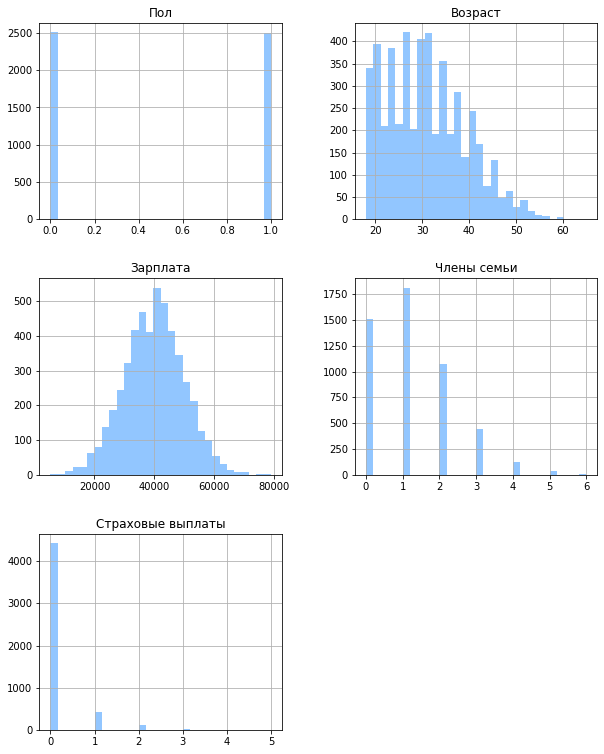

In [6]:
analyze_df(df)

In [7]:
# Удаляем дубликаты
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)
# Проверяем
df.duplicated().sum()

0

### Вывод о EDA
Было удалено 153 дубликата.\
Распределение значений близко к нормальному.\
Больших значений корреляции замечено не было.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** : При умножении признаков на обратимую матрицу, качество Линейной регрессии не изменится при условии, что матрица квадратная (т.е соответствует размерности вектора).

**Теоретическое обоснование:**  Касаемо теоретического обоснования: Признаки умножаются на обратимую матрицу как линейное преобразование. Линейная регрессия является линейной моделью, что означает, что она предполагает линейные комбинации признаков и линейные преобразования над ними для прогнозирования целевой переменной.

**Математическое обоснование:**

Используемые свойства:
$$
(AB)^T=B^T A^T
$$
$$
(AB)^{-1} = B^{-1} A^{-1}
$$
$$
A A^{-1} = A^{-1} A = E
$$
$$
AE = EA = A
$$
Доказательство:
$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$
\
Требуется доказать, что предсказания не изменятся, имеем  $a =  Xw$,   $a' = X'w'$
\
\
$$
    w = (X^T X)^{-1} X^T y
$$
\
$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
Раскрываем скобки и упрощаем выражение
$$
w' = ((XP)^{T}(XP))^{−1}(XP)^{T}y
$$
$$
w' = (P^T X^T XP )^{−1}P^{T}X^{T}y
$$
$$
w' = (P^T(X^T X)P)^{−1}P^{T}X^{T}y
$$
$$
w' = P^{−1}(P^T(X^T X))^{−1}P^{T}X^{T}y
$$
$$
w' = P^{−1}(X^T X)^{−1}(P^T)^{−1}P^{T}X^{T}y
$$
$$
w' = P^{−1}(X^T X)^{−1}EX^{T}y
$$
$$
w' = P^{−1}(X^T X)^{−1}X^{T}y
$$
Формула нахождения весов линейной регрессии после перемножения матрицы А на обратимую матрицу.\
Получается, что веса в преобразованной задаче = весам исходной задачи умноженные на матрицу обратную той, на которую мы умножали признаки.\
Связь между параметрами линейной регрессии в исходной задаче и в преобразованной:
$$
w' = P^{−1}w
$$
Подставим значения признаков X' и весов w':
$$
a'=XPP^{−1}(X^T X)^{−1}X^{T}y 
$$
$$
a'=XE(X^T X)^{−1}X^{T}y
$$
$$
a'=X(X^T X)^{−1}X^{T}y
$$
$$
a'=X'=a
$$

## Алгоритм преобразования

**Алгоритм**

Для преобразования данных юудет использован следующий алгоритм:

- Разделим данные на признаки и целевой признак.
- Создадим рандомизированную квадратную матрицу, ширина которой будет равняться количеству признаков.
- Проверим матрицу на обратимость. Если необратима - зададим другие параметры рандомизации.
- Преобразуем признаки, умножив их на матрицу и сохраним их в новой переменной - зашифрованной таблице.
- Сохраним обратную матрицу, чтобы была возможность дешифровать признаки.
- Разделим изначальный датасет и зашифрованный на тестовую и тренировочную выборку.
- Проверим метрики. Если не отличаются - задача выполнена.

(Это реализовано в функции coding в начале блокнота)

**Обоснование**

На основании полученной ранее формулы, где предсказания $a$ равны $a'$, при умножении матрицы признаков на обратимую матрицу, метрики качества не изменятся, так как будут использоывны только линейные операции.

## Проверка алгоритма

In [8]:
# Разделим дата-сет на признаки и целевой признак
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

features_encoded, encode_key = coding(features)

# Проверим шифрование
features_encoded

,Пол,Возраст,Зарплата,Члены семьи
0,27099671.0,26851825.0,38159001.0,5867671.0
1,20767689.0,20577865.0,29240226.0,4500527.0
2,11478180.0,11373325.0,16160078.0,2488353.0
3,22777758.0,22569255.0,32076630.0,4928307.0
4,14262842.0,14132485.0,20081881.0,3089925.0
...,...,...,...,...
4842,19504698.0,19326230.0,27465304.0,4222806.0
4843,28625049.0,28363165.0,40309242.0,6195443.0
4844,18518538.0,18349030.0,26078048.0,4007550.0
4845,17865029.0,17701480.0,25156951.0,3866898.0


In [9]:
regr_metrics(features, target)

Метрика R2 на тренировочной выборке: 0.43335 
 Метрика R2 на тестовой выборке: 0.41605


In [10]:
regr_metrics(features_encoded, target)

Метрика R2 на тренировочной выборке: 0.43335 
 Метрика R2 на тестовой выборке: 0.41605


## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования